In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("telecom_churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df=df.drop("customerID",axis=1)
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


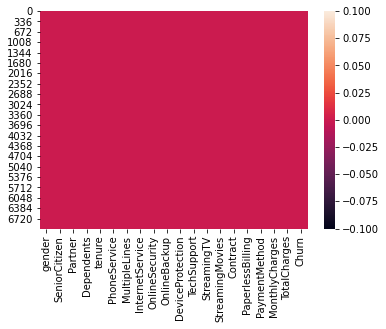

In [4]:
sns.heatmap(df.isnull())
plt.show()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [6]:
df["TotalCharges"].value_counts()

           11
20.2       11
19.75       9
20.05       8
19.65       8
           ..
1271.8      1
35.05       1
31.2        1
1004.5      1
3985.35     1
Name: TotalCharges, Length: 6531, dtype: int64

In [7]:
df["TotalCharges"].replace(" ",np.nan,inplace=True)

In [8]:
df["TotalCharges"].isnull().sum()

11

In [9]:
df["TotalCharges"]=df["TotalCharges"].astype("float")

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [11]:
m=df["TotalCharges"].mean()
print(m)

2283.3004408418697


In [12]:
df["TotalCharges"].fillna(m,inplace=True)

In [13]:
df["TotalCharges"].value_counts()

20.200000      11
2283.300441    11
19.750000       9
19.900000       8
19.650000       8
               ..
1066.150000     1
249.950000      1
8333.950000     1
7171.700000     1
1024.000000     1
Name: TotalCharges, Length: 6531, dtype: int64

In [14]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [16]:
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

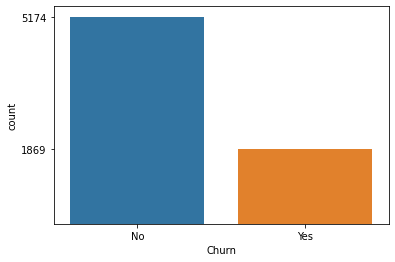

In [17]:
sns.countplot(data=df,x="Churn")
c=df["Churn"].value_counts()
plt.yticks(c)
plt.show()

In [18]:
df1=df.select_dtypes("object")
df1.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes


In [19]:
df2=df.select_dtypes(["int64","float64"])
df2.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50
2,0,2,53.85,108.15
3,0,45,42.30,1840.75
4,0,2,70.70,151.65


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
for col in df1:
    le=LabelEncoder()
    df1[col]=le.fit_transform(df1[col])

In [22]:
df1.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1


In [23]:
df_new=pd.concat([df1,df2],axis=1)
df_new.head()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,0,0,1,0,0,2,0,0,0,0,0,1,2,0,0,1,29.85,29.85
1,1,0,0,1,0,0,2,0,2,0,0,0,1,0,3,0,0,34,56.95,1889.50
2,1,0,0,1,0,0,2,2,0,0,0,0,0,1,3,1,0,2,53.85,108.15
3,1,0,0,0,1,0,2,0,2,2,0,0,1,0,0,0,0,45,42.30,1840.75
4,0,0,0,1,0,1,0,0,0,0,0,0,0,1,2,1,0,2,70.70,151.65


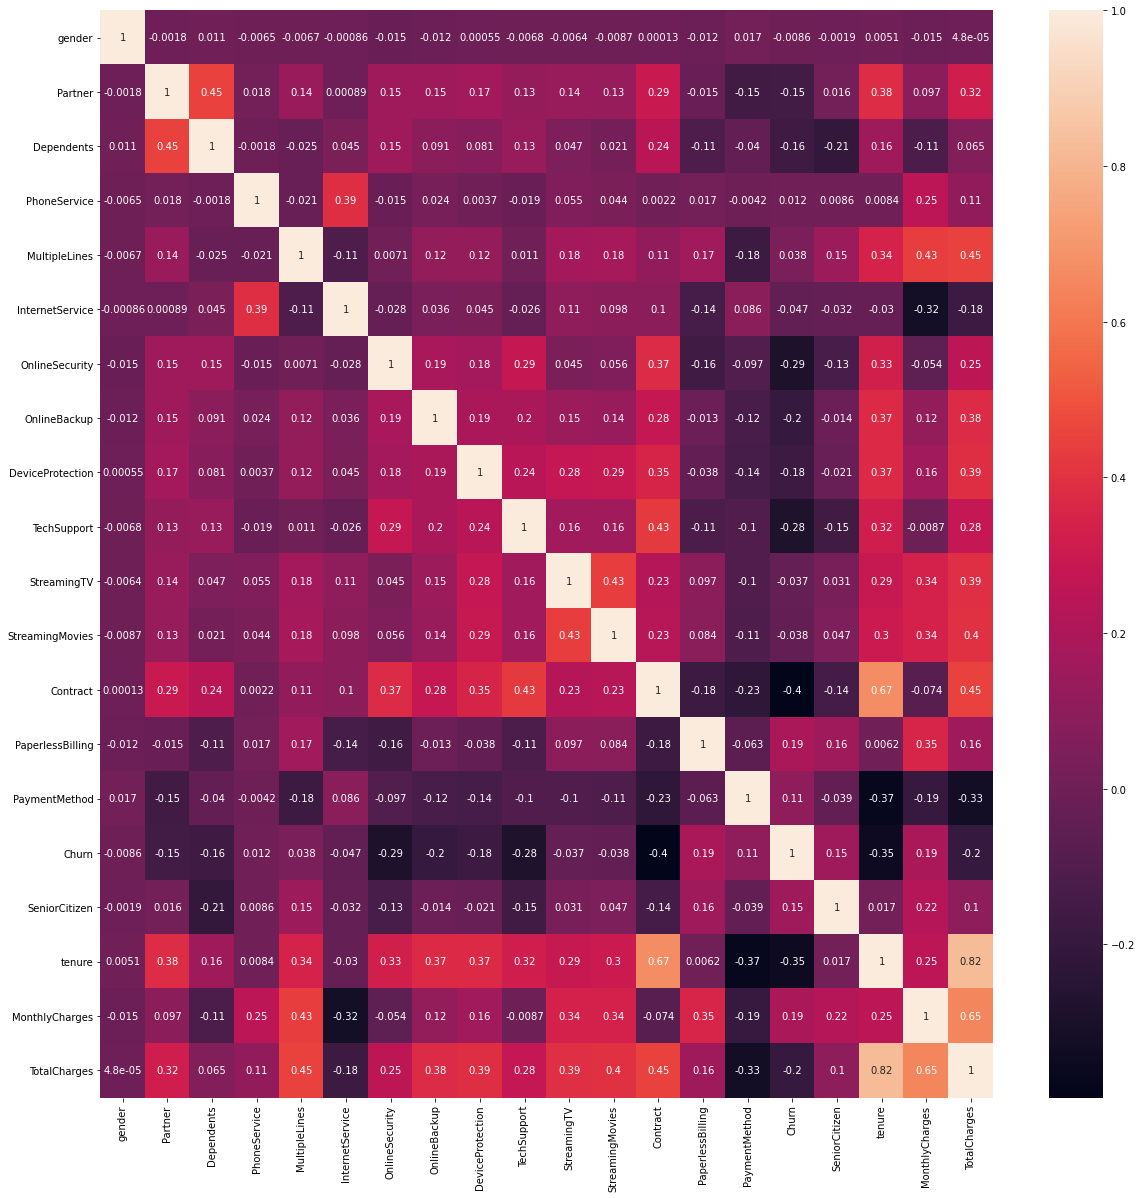

In [24]:
plt.figure(figsize=(20,20))
sns.heatmap(df_new.corr(),annot=True)
plt.show()


In [25]:
x=df_new.drop("Churn",axis=1)
y=df_new["Churn"]

In [26]:
from sklearn .model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [28]:
def create_model(model):
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print(classification_report(y_test,y_pred))
    print("confusion_matrix")
    confusion_matrix(y_test,y_pred)
    return model

In [29]:
lr=LogisticRegression()

In [30]:
lr=create_model(lr)

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1585
           1       0.62      0.58      0.60       528

    accuracy                           0.81      2113
   macro avg       0.74      0.73      0.74      2113
weighted avg       0.80      0.81      0.81      2113

confusion_matrix


In [31]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

In [32]:
pd.Series(y_train).value_counts()

0    3589
1    1341
Name: Churn, dtype: int64

In [33]:
ros=RandomOverSampler()


In [34]:
rus=RandomUnderSampler()

In [35]:
x_train1,y_train1=ros.fit_resample(x_train,y_train)


In [36]:
pd.Series(y_train1).value_counts()

1    3589
0    3589
Name: Churn, dtype: int64

In [37]:
lr=LogisticRegression()

In [38]:
lr.fit(x_train1,y_train1)

LogisticRegression()

In [39]:
pd.Series(y_test).value_counts()

0    1585
1     528
Name: Churn, dtype: int64

In [40]:
x_test1,y_test1=ros.fit_resample(x_test,y_test)

In [41]:
pd.Series(y_test1).value_counts()

1    1585
0    1585
Name: Churn, dtype: int64

In [42]:
y_pred=lr.predict(x_test1)

In [43]:
print(classification_report(y_test1,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1585
           1       0.75      0.81      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170



In [44]:
#creating function for random over sampler
def create_model(model):
    model.fit(x_train1,y_train1)
    y_pred=model.predict(x_test1)
    print(classification_report(y_test1,y_pred))
    print("confusion_matrix:-")
    print(confusion_matrix(y_test1,y_pred))
    return model

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt=DecisionTreeClassifier()

In [47]:
dt=create_model(dt)

              precision    recall  f1-score   support

           0       0.63      0.82      0.71      1585
           1       0.74      0.52      0.61      1585

    accuracy                           0.67      3170
   macro avg       0.69      0.67      0.66      3170
weighted avg       0.69      0.67      0.66      3170

confusion_matrix:-
[[1293  292]
 [ 756  829]]


In [48]:
dt1=DecisionTreeClassifier(criterion="entropy")

In [49]:
dt1=create_model(dt1)

              precision    recall  f1-score   support

           0       0.65      0.83      0.73      1585
           1       0.76      0.55      0.64      1585

    accuracy                           0.69      3170
   macro avg       0.71      0.69      0.68      3170
weighted avg       0.71      0.69      0.68      3170

confusion_matrix:-
[[1318  267]
 [ 720  865]]


In [50]:
dtg1=DecisionTreeClassifier(max_depth=5)#gini index

In [51]:
dtg1=create_model(dtg1)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1585
           1       0.73      0.80      0.77      1585

    accuracy                           0.75      3170
   macro avg       0.76      0.75      0.75      3170
weighted avg       0.76      0.75      0.75      3170

confusion_matrix:-
[[1115  470]
 [ 311 1274]]


In [52]:
dtg2=DecisionTreeClassifier(min_samples_leaf=50)#gini index

In [53]:
dtg2=create_model(dtg2)

              precision    recall  f1-score   support

           0       0.76      0.73      0.75      1585
           1       0.74      0.77      0.76      1585

    accuracy                           0.75      3170
   macro avg       0.75      0.75      0.75      3170
weighted avg       0.75      0.75      0.75      3170

confusion_matrix:-
[[1163  422]
 [ 367 1218]]


In [54]:
dte1=DecisionTreeClassifier(max_depth=5,criterion="entropy")#entropy

In [55]:
dte1=create_model(dte1)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74      1585
           1       0.73      0.80      0.77      1585

    accuracy                           0.75      3170
   macro avg       0.76      0.75      0.75      3170
weighted avg       0.76      0.75      0.75      3170

confusion_matrix:-
[[1117  468]
 [ 311 1274]]


In [56]:
dte2=DecisionTreeClassifier(min_samples_leaf=50,criterion="entropy")#entropy

In [57]:
dte2=create_model(dte2)

              precision    recall  f1-score   support

           0       0.75      0.74      0.74      1585
           1       0.74      0.75      0.74      1585

    accuracy                           0.74      3170
   macro avg       0.74      0.74      0.74      3170
weighted avg       0.74      0.74      0.74      3170

confusion_matrix:-
[[1169  416]
 [ 398 1187]]


In [58]:
from sklearn.svm import LinearSVC

In [59]:
lsvc=LinearSVC(random_state=1)

In [60]:
lsvc=create_model(lsvc)

              precision    recall  f1-score   support

           0       0.81      0.55      0.65      1585
           1       0.66      0.87      0.75      1585

    accuracy                           0.71      3170
   macro avg       0.73      0.71      0.70      3170
weighted avg       0.73      0.71      0.70      3170

confusion_matrix:-
[[ 868  717]
 [ 204 1381]]


In [61]:
from sklearn.svm import SVC

In [62]:
svc1=SVC(random_state=1,kernel="poly")#poly

In [63]:
svc1=create_model(svc1)

              precision    recall  f1-score   support

           0       0.76      0.20      0.32      1585
           1       0.54      0.94      0.68      1585

    accuracy                           0.57      3170
   macro avg       0.65      0.57      0.50      3170
weighted avg       0.65      0.57      0.50      3170

confusion_matrix:-
[[ 318 1267]
 [ 103 1482]]


In [64]:
svc2=SVC(random_state=1,kernel="rbf")#radial basis function

In [65]:
svc2=create_model(svc2)

              precision    recall  f1-score   support

           0       0.64      0.72      0.67      1585
           1       0.68      0.59      0.63      1585

    accuracy                           0.65      3170
   macro avg       0.66      0.65      0.65      3170
weighted avg       0.66      0.65      0.65      3170

confusion_matrix:-
[[1135  450]
 [ 648  937]]


In [66]:
from sklearn.ensemble import VotingClassifier

In [67]:
#creating object
lr=LogisticRegression()
dt=DecisionTreeClassifier()
dt1=DecisionTreeClassifier(criterion="entropy")
dte1=DecisionTreeClassifier(max_depth=5,criterion="entropy")#entropy
dte2=DecisionTreeClassifier(min_samples_leaf=50,criterion="entropy")#entropy
dtg1=DecisionTreeClassifier(max_depth=5)#gini index
dtg2=DecisionTreeClassifier(min_samples_leaf=50)#gini index


In [68]:
model_list=[("LogisticRegression",lr),("DecisionTreeClassifier",dt),("DecisionTreeClassifierMD",dtg1),("DecisionTreeClassifierentropy",dt1),("DecisionTreeClassifierentropyMD",dte1),("DecisionTreeClassifierMSL",dtg2),
           ("DecisionTreeClassifierentropyMSL",dte2)]

In [69]:
vc=VotingClassifier(estimators=model_list)

In [70]:
vc=create_model(vc)

              precision    recall  f1-score   support

           0       0.77      0.75      0.76      1585
           1       0.75      0.77      0.76      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

confusion_matrix:-
[[1185  400]
 [ 358 1227]]


In [71]:
vc2=VotingClassifier(estimators=model_list,voting="soft")

In [72]:
vc2=create_model(vc2)

              precision    recall  f1-score   support

           0       0.74      0.80      0.77      1585
           1       0.78      0.73      0.75      1585

    accuracy                           0.76      3170
   macro avg       0.76      0.76      0.76      3170
weighted avg       0.76      0.76      0.76      3170

confusion_matrix:-
[[1262  323]
 [ 435 1150]]


In [73]:
# importing Bagginglassifier
from sklearn.ensemble import BaggingClassifier 

In [74]:
bc=BaggingClassifier(LogisticRegression(),n_estimators=12,random_state=1)

In [75]:
bc=create_model(bc)

              precision    recall  f1-score   support

           0       0.79      0.74      0.76      1585
           1       0.75      0.80      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

confusion_matrix:-
[[1166  419]
 [ 313 1272]]


In [76]:
bc1=BaggingClassifier(LogisticRegression(),n_estimators=12,random_state=1,bootstrap=False)

In [77]:
bc1=create_model(bc1)

              precision    recall  f1-score   support

           0       0.79      0.73      0.76      1585
           1       0.75      0.81      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

confusion_matrix:-
[[1161  424]
 [ 304 1281]]


In [78]:
bc2=BaggingClassifier(LinearSVC(random_state=1),n_estimators=12,random_state=1)

In [79]:
bc2=create_model(bc2)

              precision    recall  f1-score   support

           0       0.76      0.74      0.75      1585
           1       0.75      0.77      0.76      1585

    accuracy                           0.75      3170
   macro avg       0.75      0.75      0.75      3170
weighted avg       0.75      0.75      0.75      3170

confusion_matrix:-
[[1169  416]
 [ 362 1223]]


In [80]:
bc2=BaggingClassifier(SVC(kernel="poly",random_state=1),n_estimators=12,random_state=1)

In [81]:
bc2=create_model(bc2)

              precision    recall  f1-score   support

           0       0.76      0.20      0.32      1585
           1       0.54      0.94      0.68      1585

    accuracy                           0.57      3170
   macro avg       0.65      0.57      0.50      3170
weighted avg       0.65      0.57      0.50      3170

confusion_matrix:-
[[ 318 1267]
 [ 103 1482]]


In [82]:
bc3=BaggingClassifier(SVC(kernel="rbf",random_state=1),n_estimators=12,random_state=1)

In [83]:
bc3=create_model(bc3)

              precision    recall  f1-score   support

           0       0.64      0.72      0.67      1585
           1       0.68      0.59      0.63      1585

    accuracy                           0.65      3170
   macro avg       0.66      0.65      0.65      3170
weighted avg       0.66      0.65      0.65      3170

confusion_matrix:-
[[1141  444]
 [ 655  930]]


In [84]:
bc4=BaggingClassifier(LinearSVC(random_state=1),n_estimators=12,random_state=1,bootstrap=False)

In [85]:
bc4=create_model(bc4)

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1585
           1       0.75      0.69      0.72      1585

    accuracy                           0.73      3170
   macro avg       0.73      0.73      0.73      3170
weighted avg       0.73      0.73      0.73      3170

confusion_matrix:-
[[1223  362]
 [ 494 1091]]


In [86]:
bc5=BaggingClassifier(SVC(kernel="poly",random_state=1),n_estimators=12,random_state=1,bootstrap=False)

In [87]:
bc5=create_model(bc5)

              precision    recall  f1-score   support

           0       0.76      0.20      0.32      1585
           1       0.54      0.94      0.68      1585

    accuracy                           0.57      3170
   macro avg       0.65      0.57      0.50      3170
weighted avg       0.65      0.57      0.50      3170

confusion_matrix:-
[[ 318 1267]
 [ 103 1482]]


In [88]:
bc6=BaggingClassifier(SVC(kernel="rbf",random_state=1),n_estimators=12,random_state=1,bootstrap=False)

In [89]:
bc6=create_model(bc6)

              precision    recall  f1-score   support

           0       0.64      0.72      0.67      1585
           1       0.68      0.59      0.63      1585

    accuracy                           0.65      3170
   macro avg       0.66      0.65      0.65      3170
weighted avg       0.66      0.65      0.65      3170

confusion_matrix:-
[[1135  450]
 [ 648  937]]


In [90]:
#Random Forest Tree 
#call Random Forest Tree from package
from sklearn.ensemble import RandomForestClassifier

In [91]:
rfc=RandomForestClassifier(n_estimators=15,max_features=18,random_state=1)

In [92]:
rfc=create_model(rfc)

              precision    recall  f1-score   support

           0       0.69      0.83      0.75      1585
           1       0.79      0.63      0.70      1585

    accuracy                           0.73      3170
   macro avg       0.74      0.73      0.73      3170
weighted avg       0.74      0.73      0.73      3170

confusion_matrix:-
[[1314  271]
 [ 582 1003]]


In [93]:
#call StackingClassifier
from mlxtend.classifier import StackingClassifier

In [94]:
#create a model list
model_list=[lr,dt,dte2,dt1,dte1,dtg1,dtg2,lsvc,svc1,svc2]

In [95]:
sc=StackingClassifier(classifiers=model_list,meta_classifier=LogisticRegression())

In [96]:
sc=create_model(sc)

              precision    recall  f1-score   support

           0       0.63      0.85      0.73      1585
           1       0.77      0.50      0.61      1585

    accuracy                           0.68      3170
   macro avg       0.70      0.68      0.67      3170
weighted avg       0.70      0.68      0.67      3170

confusion_matrix:-
[[1354  231]
 [ 791  794]]


In [97]:
sc1=StackingClassifier(classifiers=model_list,meta_classifier=DecisionTreeClassifier())

In [98]:
sc1=create_model(sc1)

              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1585
           1       0.75      0.54      0.63      1585

    accuracy                           0.68      3170
   macro avg       0.70      0.68      0.67      3170
weighted avg       0.70      0.68      0.67      3170

confusion_matrix:-
[[1301  284]
 [ 732  853]]


In [99]:
sc2=StackingClassifier(classifiers=model_list,meta_classifier=DecisionTreeClassifier(criterion="entropy"))

In [100]:
sc2=create_model(sc2)

              precision    recall  f1-score   support

           0       0.64      0.83      0.72      1585
           1       0.76      0.53      0.62      1585

    accuracy                           0.68      3170
   macro avg       0.70      0.68      0.67      3170
weighted avg       0.70      0.68      0.67      3170

confusion_matrix:-
[[1319  266]
 [ 747  838]]


In [101]:
sc3=StackingClassifier(classifiers=model_list,meta_classifier=DecisionTreeClassifier(max_depth=5,criterion="entropy"))

In [102]:
sc3=create_model(sc3)

              precision    recall  f1-score   support

           0       0.64      0.83      0.72      1585
           1       0.76      0.54      0.63      1585

    accuracy                           0.68      3170
   macro avg       0.70      0.68      0.68      3170
weighted avg       0.70      0.68      0.68      3170

confusion_matrix:-
[[1313  272]
 [ 727  858]]


In [103]:
sc4=StackingClassifier(classifiers=model_list,meta_classifier=DecisionTreeClassifier(min_samples_leaf=45,criterion="entropy"))

In [104]:
sc4=create_model(sc4)

              precision    recall  f1-score   support

           0       0.63      0.81      0.71      1585
           1       0.74      0.53      0.62      1585

    accuracy                           0.67      3170
   macro avg       0.69      0.67      0.67      3170
weighted avg       0.69      0.67      0.67      3170

confusion_matrix:-
[[1287  298]
 [ 741  844]]


In [105]:
sc5=StackingClassifier(classifiers=model_list,meta_classifier=DecisionTreeClassifier(min_samples_leaf=45))

In [106]:
sc5=create_model(sc5)

              precision    recall  f1-score   support

           0       0.64      0.81      0.71      1585
           1       0.74      0.53      0.62      1585

    accuracy                           0.67      3170
   macro avg       0.69      0.67      0.67      3170
weighted avg       0.69      0.67      0.67      3170

confusion_matrix:-
[[1291  294]
 [ 739  846]]


In [107]:
sc6=StackingClassifier(classifiers=model_list,meta_classifier=DecisionTreeClassifier(max_depth=5))

In [108]:
sc6=create_model(sc6)

              precision    recall  f1-score   support

           0       0.65      0.83      0.73      1585
           1       0.76      0.55      0.64      1585

    accuracy                           0.69      3170
   macro avg       0.71      0.69      0.69      3170
weighted avg       0.71      0.69      0.69      3170

confusion_matrix:-
[[1311  274]
 [ 706  879]]


In [109]:
sc7=StackingClassifier(classifiers=model_list,meta_classifier=LinearSVC(random_state=1))

In [110]:
sc7=create_model(sc7)

              precision    recall  f1-score   support

           0       0.61      0.84      0.71      1585
           1       0.74      0.47      0.58      1585

    accuracy                           0.65      3170
   macro avg       0.68      0.65      0.64      3170
weighted avg       0.68      0.65      0.64      3170

confusion_matrix:-
[[1329  256]
 [ 839  746]]


In [111]:
sc8=StackingClassifier(classifiers=model_list,meta_classifier=SVC(kernel="poly",random_state=1))

In [112]:
sc8=create_model(sc8)

              precision    recall  f1-score   support

           0       0.61      0.89      0.72      1585
           1       0.79      0.44      0.57      1585

    accuracy                           0.66      3170
   macro avg       0.70      0.66      0.64      3170
weighted avg       0.70      0.66      0.64      3170

confusion_matrix:-
[[1405  180]
 [ 890  695]]


In [113]:
sc9=StackingClassifier(classifiers=model_list,meta_classifier=SVC(kernel="rbf",random_state=1))

In [114]:
sc9=create_model(sc9)

              precision    recall  f1-score   support

           0       0.62      0.87      0.72      1585
           1       0.78      0.46      0.58      1585

    accuracy                           0.67      3170
   macro avg       0.70      0.67      0.65      3170
weighted avg       0.70      0.67      0.65      3170

confusion_matrix:-
[[1383  202]
 [ 859  726]]


In [115]:
from sklearn.ensemble import AdaBoostClassifier

In [116]:
ada=AdaBoostClassifier(n_estimators=25)

In [117]:
ada=create_model(ada)

              precision    recall  f1-score   support

           0       0.80      0.73      0.76      1585
           1       0.75      0.82      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.78      0.77      0.77      3170
weighted avg       0.78      0.77      0.77      3170

confusion_matrix:-
[[1150  435]
 [ 282 1303]]


In [118]:
from sklearn.ensemble import GradientBoostingClassifier

In [119]:
gbc=GradientBoostingClassifier(n_estimators=25)

In [120]:
gbc=create_model(gbc)

              precision    recall  f1-score   support

           0       0.80      0.72      0.76      1585
           1       0.75      0.82      0.78      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

confusion_matrix:-
[[1139  446]
 [ 278 1307]]


In [121]:
from xgboost import XGBClassifier

In [122]:
xgb=XGBClassifier(n_estimators=5,reg_alpha=1)

In [123]:
xgb=create_model(xgb)

[18:54:20] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1585
           1       0.76      0.78      0.77      1585

    accuracy                           0.77      3170
   macro avg       0.77      0.77      0.77      3170
weighted avg       0.77      0.77      0.77      3170

confusion_matrix:-
[[1186  399]
 [ 342 1243]]
